In [23]:
import pandas as pd



df = pd.read_csv("tips.csv") 
df.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
%pip install seaborn







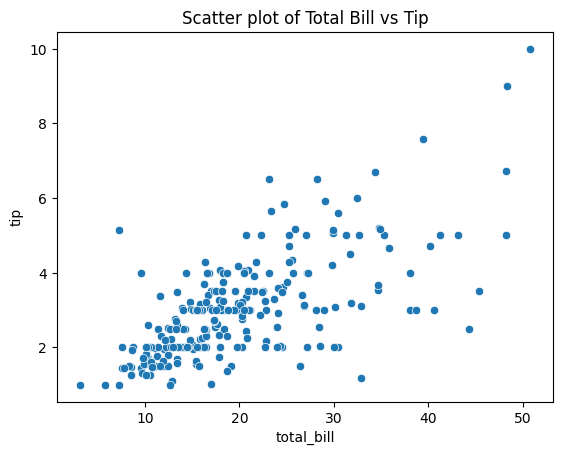

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()



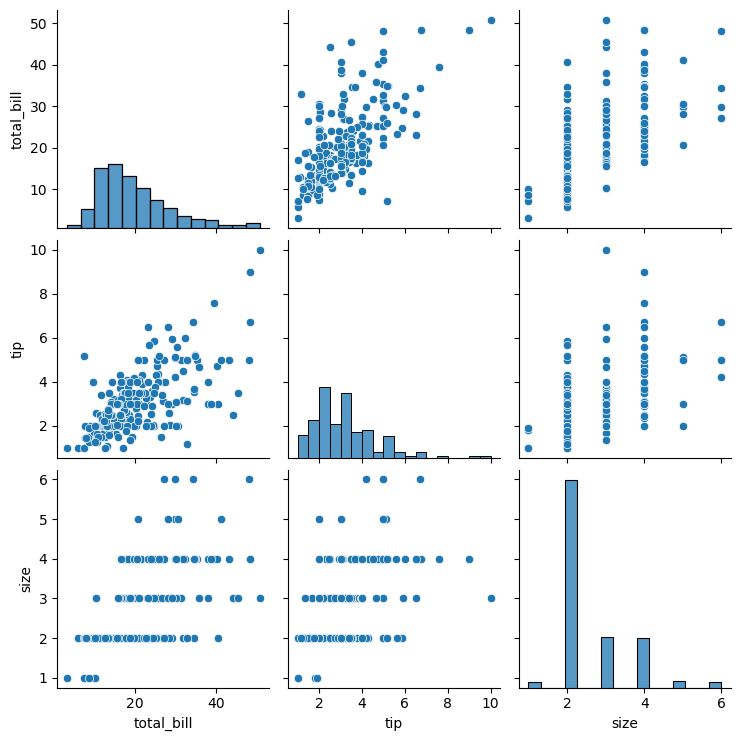

In [19]:
sns.pairplot(df)
plt.show()


In [21]:
df.select_dtypes(include=['object']).columns


Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [23]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # Replace 'Gender' with your actual column name


In [27]:
df = pd.get_dummies(df, drop_first=True)  # Drop first to avoid multicollinearity


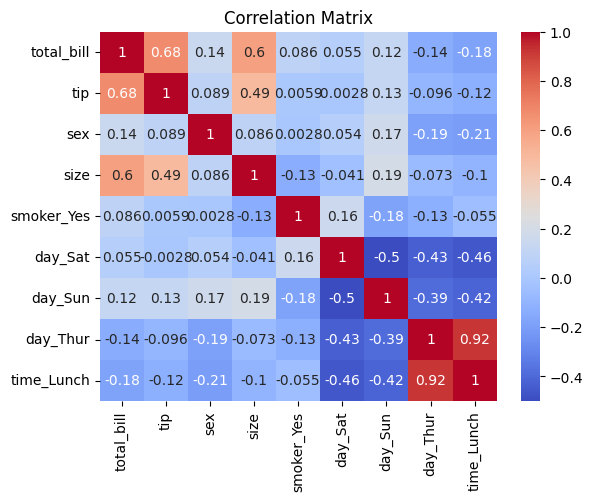

In [28]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


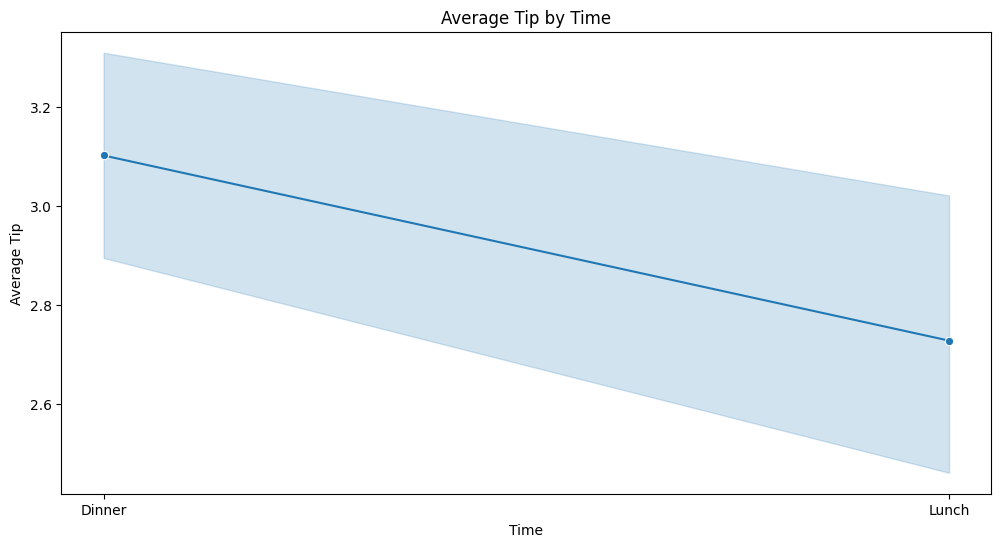

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="tip", marker="o")
plt.title("Average Tip by Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

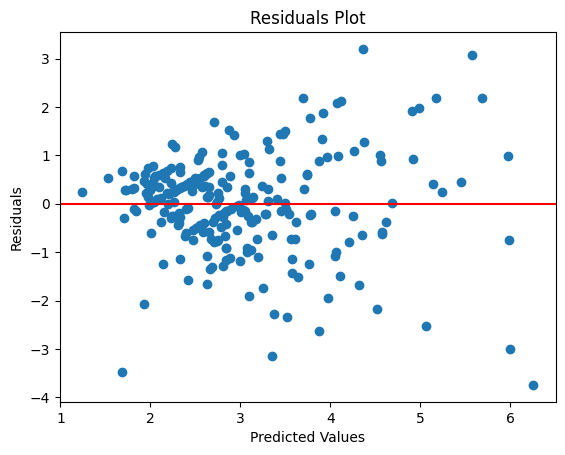

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['total_bill']].values
y = df['tip'].values
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

plt.scatter(predictions, predictions - y)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [26]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow statistic: {rainbow_statistic}, p-value: {rainbow_p_value}')


Rainbow statistic: 1.2291480226129026, p-value: 0.1291192152551375


In [32]:
#regression models


In [27]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression().fit(X, y)
predictions_lr = model_lr.predict(X)
mse_lr = mean_squared_error(y, predictions_lr)


In [28]:
from sklearn.linear_model import Ridge, Lasso

model_ridge = Ridge(alpha=1.0).fit(X, y)
model_lasso = Lasso(alpha=0.1).fit(X, y)


In [29]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor(max_depth=5).fit(X, y)


In [30]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100).fit(X, y)


In [31]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5).fit(X, y)


In [32]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf').fit(X, y)


In [33]:
from sklearn.metrics import mean_absolute_error, r2_score

#  linear regression
mse = mean_squared_error(y, predictions_lr)
mae = mean_absolute_error(y, predictions_lr)
r2 = r2_score(y, predictions_lr)

print(f'MSE: {mse}, MAE: {mae}, R2 Score: {r2}')


MSE: 1.036019442011377, MAE: 0.7458253894586339, R2 Score: 0.45661658635167657


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ridge and lasso ,regularization
y_pred = model_ridge.predict(X) 

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1.0360194443584407
Mean Absolute Error: 0.7458297186435674
R2 Score: 0.4566165851206615


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# decision tree regression
y_pred = model_tree.predict(X)  

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.7194323617022822
Mean Absolute Error: 0.6032505848913756
R2 Score: 0.6226638258526345


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest (Ensemble Method):
y_pred = model_rf.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.24282196195135242
Mean Absolute Error: 0.35295166081186574
R2 Score: 0.8726419396746609


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# K-Nearest Neighbors (KNN):
y_pred = model_knn.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 0.8382663770491803
Mean Absolute Error: 0.676188524590164
R2 Score: 0.5603363923139638


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Support Vector Regression (SVR):
y_pred = model_svr.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1.0661753159271032
Mean Absolute Error: 0.7238486639068351
R2 Score: 0.4408000861535115


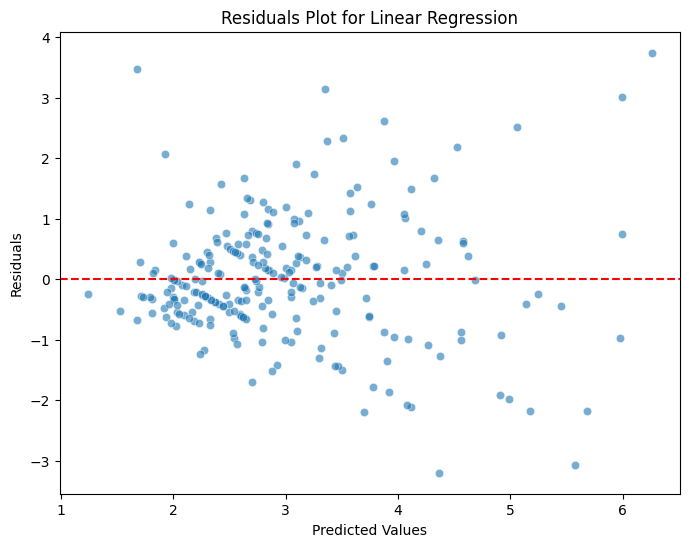

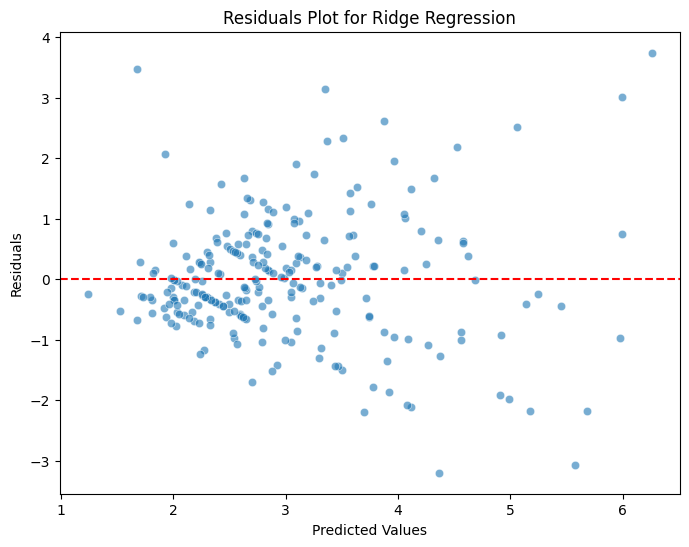

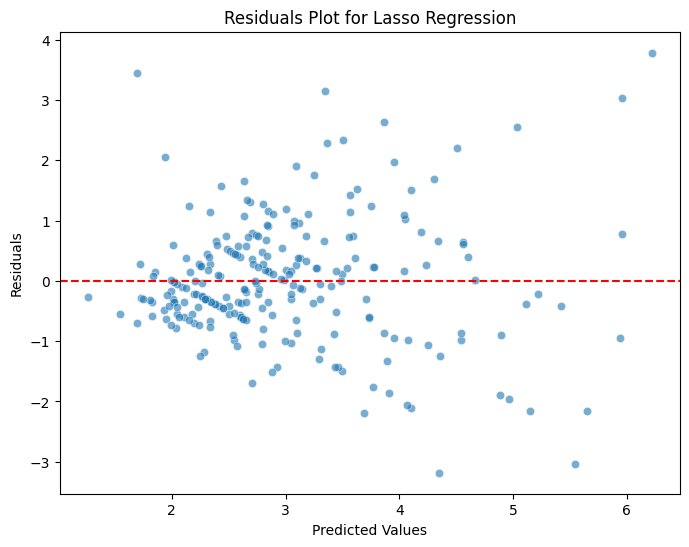

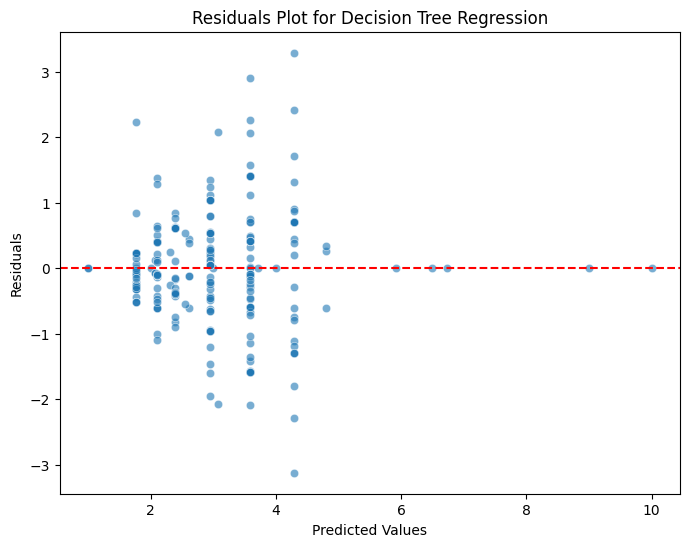

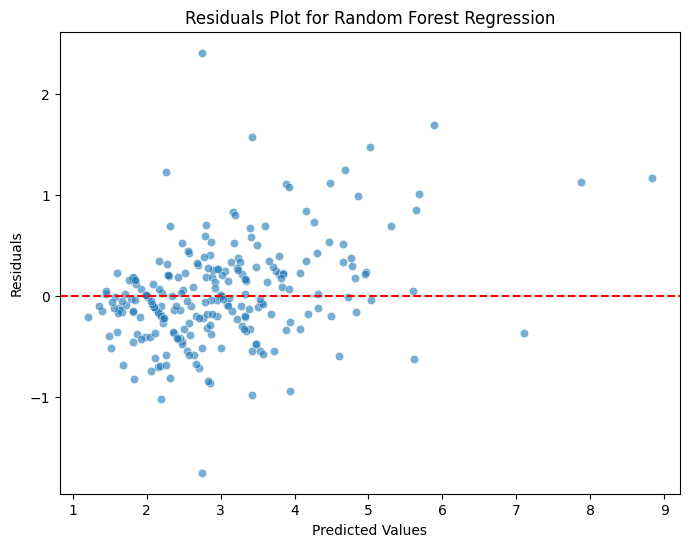

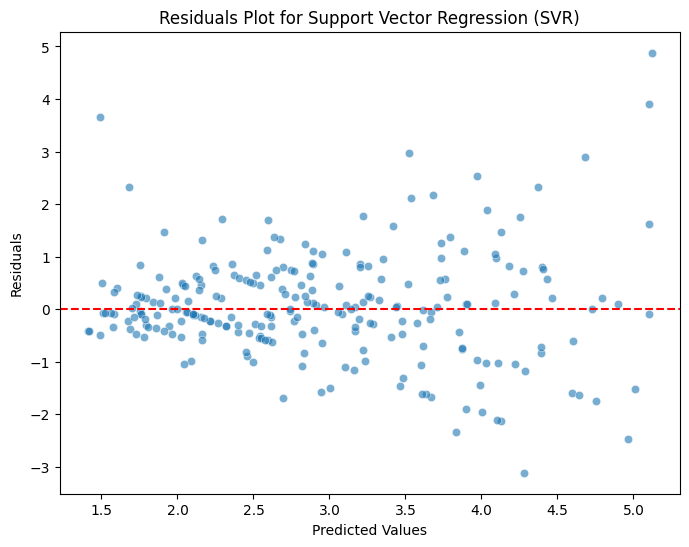

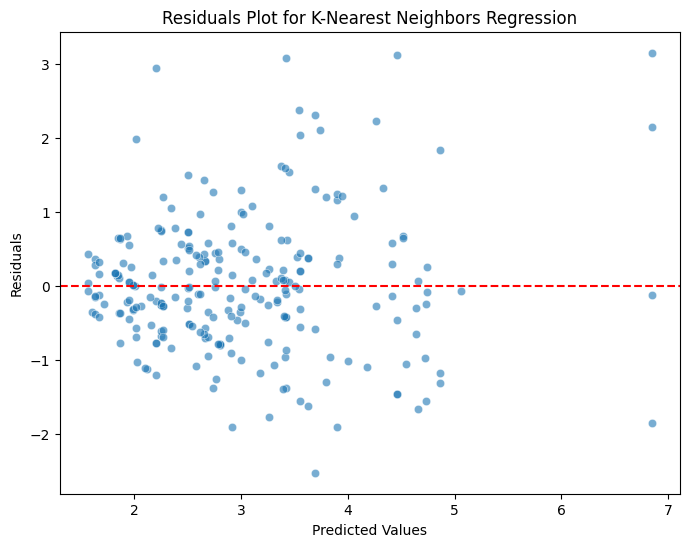

In [44]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr = model_lr.predict(X)
plot_residuals(y, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = model_ridge.predict(X)
plot_residuals(y, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = model_lasso.predict(X)
plot_residuals(y, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree = model_tree.predict(X)
plot_residuals(y, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = model_rf.predict(X)
plot_residuals(y, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = model_svr.predict(X)
plot_residuals(y, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = model_knn.predict(X)
plot_residuals(y, y_pred_knn, "K-Nearest Neighbors Regression")